In [1]:
import os

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import math
from pyspark.sql import SparkSession
from pyspark.sql.functions import regexp_replace,rand,col
from pyspark.sql.types import StructType,StructField, StringType, IntegerType, DoubleType, TimestampType

import warnings
warnings.filterwarnings('ignore')

# Exercise 1

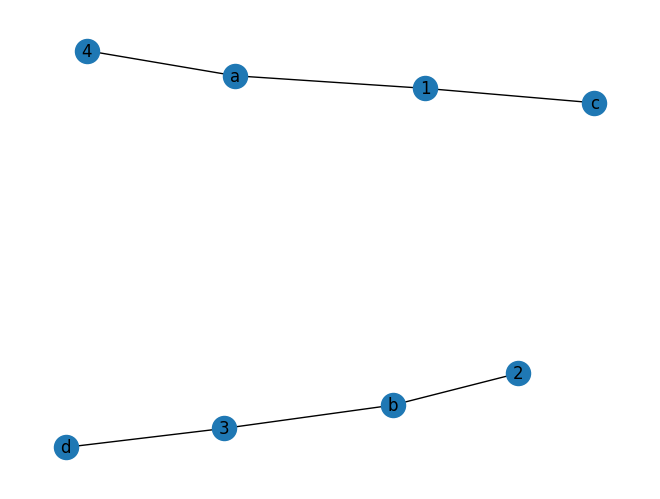

In [2]:
G = nx.Graph()

G.add_nodes_from(['1','2','3','4','a','b','c','d'])
G.add_edges_from(
    [('1', 'a'), ('1', 'c'), ('2', 'b'), ('3', 'b'), ('3', 'd'),
     ('4', 'a')])


nx.draw(G, with_labels=True)
plt.show()

The matching can break depending on the order. The save approach is to first feed edges needed in the matching into the greedy algorithm.
A possible ordering could be:
(1,c) - (4,a) - (3,d) - (2,b) - (3,b) - (1,a)

An ordering which does not return a perfect matching could for example start with the edges which are not part of the perfect matching:
(3,b) - (1,a) - (1,c) - (4,a) - (3,d) - (2,b)

# Exercise 2

We have to show that the advertiser k with the highest budget has the largest value for $\psi_k(q)$.
Looking at the formula we have: $\psi_k(q) = x_k(1-e^{-f_k})$ this can be simplified as by assumption
$x_k=1$. Next one can look at the funktion of $1-e^{-f_k}$ and realize that the bigger $f_k$ is the bigger
is the final value. Hence, one only needs to compare check if $f_k$ is bigger the greater the budget.
$f_k =1 - \frac{spent so far}{budget}$ this is bigger if the fraction is small.

If an advertiser has more budget the fraction becomes smaller and hence he is preferred. Additionally,
if an advertiser has not spent alot of money the fraction also becomes smaller. Hence, this works as required.

# Exercise 3

Suppose we need 3 hash functions which hash to m buckets, hence we add mod m to all hashes. Additionally, we divide by some big prime.
Lastly to differentiate alot we do some exponentials on some random integers:

(1 -  random int a): h(x) = ((a * x¹) mod p ) mod m
(2 -  random int b): h(x) = ((b * x²) mod p ) mod m
(3 -  random int c): h(x) = ((c * x³) mod p ) mod m

The exponential components should spread the inputs among very different ranges additionally.

# Exercise 4

### a)

The formula from the lecture can be used with n=5 and m=1 giving

1-(1-1/5)^(5*(1/5)) = 0.2

### b)
$h_1(1)=1$, $h_2(1)=0$

$h_1(4)=4$, $h_2(4)=1$

state of the bitbucket:
b(0)=1
b(1)=1
b(2)=0
b(3)=0
b(4)=1

h1 can hit all bites while h2 can only hit the odd ones. Hence, odd index bits are actually mor likely to be hit.

### c)

The probability of a false positive is: $1 - e^{\frac{-m}{n}}=1 - e^{\frac{-1}{5}}$ which is approximately 0.1812.

# Exercise 5

### a)
We need to determine for which k-values we have the lowest error rate after m/8 steps considering different array sizes.


In [3]:
def get_error_rate_func(n,m):
    # we use the formula from the lecture
    function = lambda k: math.pow((1 - math.pow(math.e,((-k*m) / n))),k)
    return function

Probing for n of size :1*m
0.11750309741540454
Probing for n of size :2*m
0.06058693718652419
Probing for n of size :3*m
0.040810542890861834
Probing for n of size :4*m
0.03076676552365587
Probing for n of size :5*m
0.024690087971667385
Probing for n of size :6*m
0.02061781866875978
Probing for n of size :7*m
0.017698648900262293
Probing for n of size :8*m
0.015503562994591547
Probing for n of size :9*m
0.013792883256083743
Probing for n of size :10*m
0.012422199506118559
Probing for n of size :11*m
0.011299314123332849
Probing for n of size :12*m
0.01036260108500342
Probing for n of size :13*m
0.009569304615308916
Probing for n of size :14*m
0.008888830100408085
Probing for n of size :15*m
0.008298707361124036
Probing for n of size :16*m
0.007782061739756485
Probing for n of size :17*m
0.007325974439920335
Probing for n of size :18*m
0.006920387509683934
Probing for n of size :19*m
0.0065573534751627305
Probing for n of size :20*m
0.006230509376605298


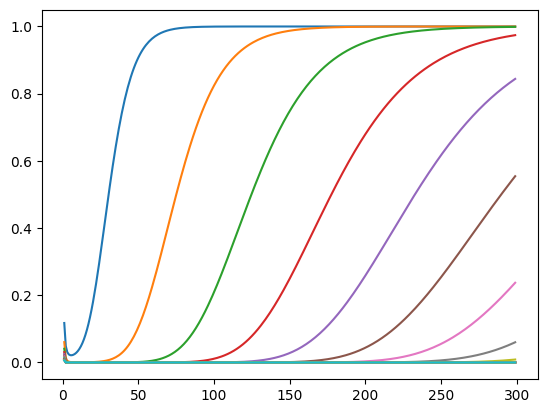

In [4]:
# let's define the number of steps to be 100 = m/8
steps = 1000

# hence we know that m is 8*steps
m = steps * 8

# next we can define the different sizes of bit arrays fow which we probe
n_s = np.arange(1,21,1)
n_s = n_s * m

# lastly we can define for which k's we are going to probe
k_s = np.arange(1,300,1)

x=1
# actual probing and plotting
for n in n_s:
    print("Probing for n of size :" +str(x)+"*m")
    calculator_function = get_error_rate_func(n,steps)
    print(calculator_function(1))
    error_rates=[]
    for k in k_s:
        error_rates.append(calculator_function(k))

    plt.plot(k_s,error_rates)
    x+=1


Functions of lower m's reach their local minimum earlier and scale at an earlier point. However, even for large values of m large k's do not provide a significant improvement as the local minimum is barly better than on reached for even quite low k. Meaning fo k~6 a good value is reached for all functions

### b)

In [5]:
# let's define the number of steps to be 100 = m/8
steps = 100

# hence we know that m is 8*steps
m = steps * 8

# next we can define the different sizes of bit arrays fow which we probe
n_s = np.arange(1,100,1)
n_s = n_s * m

# lastly we can define for which k's we are going to probe
k_s = np.arange(1,300,1)

x=1

smallest_n_one_percent =        1000000
smallest_n_point_five_percent = 1000000
smallest_n_point_one_percent  = 1000000

smallest_k_one_percent =        1000000
smallest_k_point_five_percent = 1000000
smallest_k_point_one_percent  = 1000000
# actual probing and plotting
for n in n_s:
    calculator_function = get_error_rate_func(n,steps)
    for k in k_s:
        error_rate = calculator_function(k)
        if error_rate < 0.01:
            if n <smallest_n_one_percent:
                smallest_n_one_percent=n
                smallest_k_one_percent=k

            if error_rate < 0.005:
                if n <smallest_n_point_five_percent:
                    smallest_n_point_five_percent=n
                    smallest_k_point_five_percent=k

            if error_rate < 0.001:
                if n <smallest_n_point_one_percent:
                    smallest_n_point_one_percent=n
                    smallest_k_point_one_percent=k

print("For one percent the following results were found:")
print("n: "+str(smallest_n_one_percent))
print("k: "+str(smallest_k_one_percent))

print("For point five percent the following results were found:")
print("n: "+str(smallest_n_point_five_percent))
print("k: "+str(smallest_k_point_five_percent))

print("For point one percent the following results were found:")
print("n: "+str(smallest_n_point_one_percent))
print("k: "+str(smallest_k_point_one_percent))


For one percent the following results were found:
n: 1600
k: 3
For point five percent the following results were found:
n: 1600
k: 3
For point one percent the following results were found:
n: 1600
k: 6


# Exercise 6

By result of the lecture we know the probability with wich a error occurs in any of the individual arrays.
It is for n' = n/k :
$1-e^{-m/(n/k)}$
Additionally we know that this has to be true for all k arrays at the same time hence:
$(1-e^{-m/(n/k)})^k$
Solving using the laws of exponential gives:
$(1-e^{-mk/n}) $
this is exactly the same as what we covered in the lecture for k hash functions into the same array.

# Exercise 7 -- skiped for now

# Exercise 8

### a)
The key attribute is the university ID. For each courseID we count how many studentIDs are associated and thus calculate the average for all courses.

### b)
The key attribute is the studentID along with the grade attribute. We look for tuples with the grade == 2.0 and see which fraction of all tuples are such.

### c)
The key attribute is the courseID, but in dependence with the university ID. This is to ensure that we calculate each course correctly. And of course we look at all tuples where the attribute grade == 1.7.

# Exercise 9

First we create a context and session to work with

In [6]:
spark = SparkSession.builder.appName("HelloWorld").getOrCreate()
sc = spark.sparkContext

23/01/23 15:47:15 WARN Utils: Your hostname, jakob-ThinkPad-E15-Gen-4 resolves to a loopback address: 127.0.1.1; using 147.142.138.118 instead (on interface wlp3s0)
23/01/23 15:47:15 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/01/23 15:47:15 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Next we want to define our subroutine for reading in a file

In [7]:
def read_in_ec2_file(path):
    df = spark.read.csv(path, sep='\t', header=True)
    df = df.drop("Type")
    df = df.withColumn("Price",df.Price.cast(DoubleType()))
    df = df.withColumn("Timestamp",df.Timestamp.cast(TimestampType()))
    return df

The above implementation was done as part of exercise 8 and was tested back then.

## a)

In [8]:
### ----------------------------------------
### This is where the new programming starts
### ----------------------------------------
def create_price_timeseries(dataframe):
    price_time_series = {}

    unique_pairs = dataframe.select(["InstanceType","ProductDescription","AvailabilityZone"]).distinct()
    unique_pairs_collected = unique_pairs.collect()

    for unique_pair in unique_pairs_collected:
        #create the dataframe
        time_series_dataframe = dataframe.filter((dataframe.InstanceType == unique_pair.InstanceType) & (dataframe.ProductDescription == unique_pair.ProductDescription) & (dataframe.AvailabilityZone == unique_pair.AvailabilityZone)).select("Timestamp","Price")

        #create the dictionary key
        dictionary_key = str(unique_pair.InstanceType)+str(unique_pair.ProductDescription)+str(unique_pair.AvailabilityZone)

        price_time_series.update({dictionary_key:time_series_dataframe})

    return price_time_series

Bellow a testing ground is added to verify the programm

In [9]:
print("Reading in the file")
test_file_name = 'prices-eu-central-1-2019-05-24.txt.gz'
file_path = 'data_sheet8/'
full_test_path = file_path + test_file_name

print("Printing its schema")
datafram_read = read_in_ec2_file(full_test_path)
datafram_read.printSchema()

print("creating price-timerseries dictionary")
dictionary_with_dataframes = create_price_timeseries(datafram_read)
print("Showing some example from the map.")
print("Key used for the example: m5.24xlargeLinux/UNIXeu-central-1b")
dictionary_with_dataframes.get("m5.24xlargeLinux/UNIXeu-central-1b").show()

Reading in the file
Printing its schema
root
 |-- Price: double (nullable = true)
 |-- Timestamp: timestamp (nullable = true)
 |-- InstanceType: string (nullable = true)
 |-- ProductDescription: string (nullable = true)
 |-- AvailabilityZone: string (nullable = true)

creating price-timerseries dictionary
Showing some example from the map.
Key used for the example: m5.24xlargeLinux/UNIXeu-central-1b
+-------------------+-----+
|          Timestamp|Price|
+-------------------+-----+
|2019-05-24 01:47:02|1.671|
|2019-05-23 09:40:28|1.671|
|2019-05-22 09:40:15|1.671|
|2019-05-21 13:46:44|1.671|
|2019-05-20 22:33:18|1.671|
|2019-05-19 22:32:47|1.671|
|2019-05-18 22:32:37|1.671|
|2019-05-17 22:31:53|1.671|
|2019-05-16 22:31:25|1.671|
|2019-05-15 22:30:42|1.671|
|2019-05-14 22:30:34|1.671|
|2019-05-14 20:33:31|1.671|
|2019-05-13 20:32:48|1.671|
|2019-05-13 00:32:47|1.671|
|2019-05-12 04:33:01|1.671|
|2019-05-11 13:33:28|1.671|
|2019-05-10 13:32:45|1.671|
|2019-05-10 12:35:57|1.671|
|2019-05-

### b)

In [14]:
def function_save_dataframe(dataframe, filename):
    path= os.getcwd()+"/fileStorrage/"+filename.replace("/","")+".csv";
    # the conversion to pandas is necessary as we do not want to work with all these folders
    # which also makes the append mode not work
    dataframe.toPandas().to_csv(path,mode='a', header=True)

In [11]:
print("Reading in the file")
test_file_name = 'prices-eu-central-1-2019-05-24.txt.gz'
file_path = 'data_sheet8/'
full_test_path = file_path + test_file_name

print("Printing its schema")
datafram_read = read_in_ec2_file(full_test_path)
datafram_read.printSchema()

print("creating price-timerseries dictionary")
dictionary_with_dataframes = create_price_timeseries(datafram_read)
print("Showing some example from the map.")
print("Key used for the example: m5.24xlargeLinux/UNIXeu-central-1b")
dictionary_with_dataframes.get("m5.24xlargeLinux/UNIXeu-central-1b").show()

function_save_dataframe(dictionary_with_dataframes.get("m5.24xlargeLinux/UNIXeu-central-1b"),"m5.24xlargeLinux/UNIXeu-central-1b")

Reading in the file
Printing its schema
root
 |-- Price: double (nullable = true)
 |-- Timestamp: timestamp (nullable = true)
 |-- InstanceType: string (nullable = true)
 |-- ProductDescription: string (nullable = true)
 |-- AvailabilityZone: string (nullable = true)

creating price-timerseries dictionary
Showing some example from the map.
Key used for the example: m5.24xlargeLinux/UNIXeu-central-1b
+-------------------+-----+
|          Timestamp|Price|
+-------------------+-----+
|2019-05-24 01:47:02|1.671|
|2019-05-23 09:40:28|1.671|
|2019-05-22 09:40:15|1.671|
|2019-05-21 13:46:44|1.671|
|2019-05-20 22:33:18|1.671|
|2019-05-19 22:32:47|1.671|
|2019-05-18 22:32:37|1.671|
|2019-05-17 22:31:53|1.671|
|2019-05-16 22:31:25|1.671|
|2019-05-15 22:30:42|1.671|
|2019-05-14 22:30:34|1.671|
|2019-05-14 20:33:31|1.671|
|2019-05-13 20:32:48|1.671|
|2019-05-13 00:32:47|1.671|
|2019-05-12 04:33:01|1.671|
|2019-05-11 13:33:28|1.671|
|2019-05-10 13:32:45|1.671|
|2019-05-10 12:35:57|1.671|
|2019-05-

This has been tested for a single file now we only need to create a final script which combines all of the above.

### c)

In [15]:
file_path = 'data_sheet8/'
files = os.listdir(os.getcwd()+"/data_sheet8")
filesToDelete = os.listdir(os.getcwd()+"/fileStorrage")

for file in filesToDelete:
    os.remove(os.getcwd()+"/fileStorrage/"+file)

for filename in files:
    print("Reading in the file: "+str(filename))
    full_test_path = file_path + filename

    datafram_read = read_in_ec2_file(full_test_path)

    print("creating price-timerseries dictionary")
    dictionary_with_dataframes = create_price_timeseries(datafram_read)
    for key in dictionary_with_dataframes.keys():
        if key == "m4.16xlargeLinux/UNIXca-central-1a":
            function_save_dataframe(dictionary_with_dataframes.get(key),key)

Reading in the file: prices-sa-east-1-2019-05-10.txt.gz
creating price-timerseries dictionary
Reading in the file: prices-eu-central-1-2019-05-03.txt.gz
creating price-timerseries dictionary
Reading in the file: prices-ca-central-1-2019-05-24.txt.gz
creating price-timerseries dictionary
Reading in the file: prices-eu-west-2-2019-05-10.txt.gz
creating price-timerseries dictionary
Reading in the file: prices-eu-west-3-2019-05-24.txt.gz
creating price-timerseries dictionary
Reading in the file: prices-sa-east-1-2019-05-24.txt.gz
creating price-timerseries dictionary
Reading in the file: prices-eu-west-1-2019-05-17.txt.gz
creating price-timerseries dictionary
Reading in the file: prices-eu-central-1-2019-05-24.txt.gz
creating price-timerseries dictionary
Reading in the file: prices-eu-west-1-2019-05-03.txt.gz
creating price-timerseries dictionary
Reading in the file: prices-eu-west-2-2019-05-24.txt.gz
creating price-timerseries dictionary
Reading in the file: prices-eu-central-1-2019-05-10

This would have probably run for over an hour hence the writing is only performed for the
appropriate setting. As most of the time was used for all og the required IO operations needed.

So lastly the correct result need to be extracted from the file.

In [27]:
dataframe = df = spark.read.csv(os.getcwd()+"/fileStorrage/m4.16xlargeLinuxUNIXca-central-1a.csv", sep=',', header=True)
print("The amount of obtained elements is: "+str(dataframe.count()))
print("The averrage price obtained is: ")
df.agg({"Price":'avg'}).show()


The amount of obtained elements is: 618
The averrage price obtained is: 
+-----------------+
|       avg(Price)|
+-----------------+
|1.373579024390249|
+-----------------+

